In [1]:
## using NetworkX to make a different degree distribution!
import networkx as nx
import numpy as np
import scipy
import matplotlib.pyplot as plt


In [3]:
N = 5000
## choose network from network X and change M0 and G
M0 = 300

G = nx.barabasi_albert_graph(N, M0)

## initialize time
T = 0
## choose Tmax
Tmax = 1000

## return edge matrix (required for the simulation)
E_barabasi = list(G.edges)

M = np.shape(E_barabasi)[0]

def find_extinction_time(b, E):

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))

    ## start out with all infectious individuals
    X = np.ones(N, dtype = int)

    ## initialize number infected (all infected)
    I = N

    ## initialize list of infected people for all timesteps
    infected = np.zeros(n)

    # run simulation
    for t in range(n):

        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            I -= X[i]

            X[i] = 0

        else:

            i,j = E[np.random.randint(M)]

            I += X[i] ^ X[j]

            X[i] = X[j] = (X[i] or X[j])
    
        infected[t] = I

        ## if zero infected people, break simulation, truncate infected array
        if I == 0:

            infected = infected[:t]

            break

    ## return extinction time, if there is no extinction time, the time returned will be Tmax
    return times[len(infected)- 1]

def extinction_time_simulation(b_array, E):

    extinction_times = np.zeros(len(b_array))

    for i, b in zip(np.arange(0, len(b_array), dtype = int), b_array):

        extinction = 0

        if round(find_extinction_time(b, E)) == Tmax:
            
            extinction_times[i] = Tmax
        
        else:
        
            for t in range(20):

                extinction += find_extinction_time(b, E)

            extinction_times[i] = extinction / 20
        
        print(extinction_times[i])
    
    return extinction_times


In [4]:
## code to find the the leading eigenvalue of the adjacency matrix of the barabasi albert graph 
import scipy
from scipy.sparse import linalg 
def find_leading_eigenvalue(G):
    adj = nx.adjacency_matrix(G)
    adj = adj.asfptype()
    leading_eigenvalue = linalg.eigs(A = adj, k = 1, return_eigenvectors = False)
    return leading_eigenvalue

leading_eigenvalue = find_leading_eigenvalue(G)
print(leading_eigenvalue)


[744.60379823+0.j]


In [14]:
## run simulation for graph of the variance in the extinction times as a function of b
b_array = np.linspace(0, 0.0020, 20)
print(b_array)
barabasi_extinction_times = extinction_time_simulation(b_array, E_barabasi)
print(barabasi_extinction_times)


[0.         0.00010526 0.00021053 0.00031579 0.00042105 0.00052632
 0.00063158 0.00073684 0.00084211 0.00094737 0.00105263 0.00115789
 0.00126316 0.00136842 0.00147368 0.00157895 0.00168421 0.00178947
 0.00189474 0.002     ]
9.01050899327427
9.608553449606626
10.186849734407254
10.215085173498839
11.30308854565833
12.002012881883266
14.137366465406945
17.22961181259482
18.36594830624204
19.47589153927546
24.617680467887308
34.45482995844103
44.48171252771776
143.35100859430068
1000.0
1000.0
1000.0
1000.0
1000.0
1000.0
[   9.01050899    9.60855345   10.18684973   10.21508517   11.30308855
   12.00201288   14.13736647   17.22961181   18.36594831   19.47589154
   24.61768047   34.45482996   44.48171253  143.35100859 1000.
 1000.         1000.         1000.         1000.         1000.        ]


In [5]:
barabasi_extinction_times =[8.887399549212255,
9.363010514289858,
10.377007534200205,
11.078994960275342,
11.86908566973643,
13.673856966720766,
14.021191772424606,
14.83735134630478,
18.92318513126268,
20.42119222202599,
27.789538985977497,
33.967610513194884,
55.44573880307272,
118.73729667538869,
1000.0,
1000.0,
1000.0,
1000.0,
1000.0,
1000.0]

N = 5000
leading_eigenvalue = 744.60379823
## predicted by model:
b_array = np.linspace(0, 0.0020, 20)
model = []
model_b = np.linspace(0,0.00135,1000)
for b in model_b:
    estimate = (np.log(N) + 1) / (1-(leading_eigenvalue*b))
    model.append(estimate)


In [6]:
from scipy.optimize import minimize
import numpy as np

y = np.array([8.887399549212255,
9.363010514289858,
10.377007534200205,
11.078994960275342,
11.86908566973643,
13.673856966720766,
14.021191772424606,
14.83735134630478,
18.92318513126268,
20.42119222202599,
27.789538985977497,
33.967610513194884,
55.44573880307272,
118.73729667538869])

x = np.array([0.,         0.00010526, 0.00021053, 0.00031579, 0.00042105, 0.00052632,
 0.00063158, 0.00073684, 0.00084211, 0.00094737, 0.00105263, 0.00115789,
 0.00126316, 0.00136842])

N = 5000
# Define the Model
def f(b, x): return (np.log(N) + 1) / (1-(b*x))

# The objective Function to minimize (least-squares regression)
def obj(x, y, b): return np.sum((y - f(b, x))**2)

# res.x contains your coefficients
res = minimize(lambda coeffs: obj(x, y, *coeffs), x0=np.zeros(1))
best_fit_eignvalue = res.x
print(best_fit_eignvalue)


[670.45522839]


In [7]:
## predicted by model2:
b_array = np.linspace(0, 0.0020, 20)
model_best_fit = []
model_b = np.linspace(0,0.00135,1000)
for b in model_b:
    estimate = (np.log(N) + 1) / (1-(best_fit_eignvalue*b))
    model_best_fit.append(estimate)


c:\Users\sharm\anaconda3\envs\iibproject\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


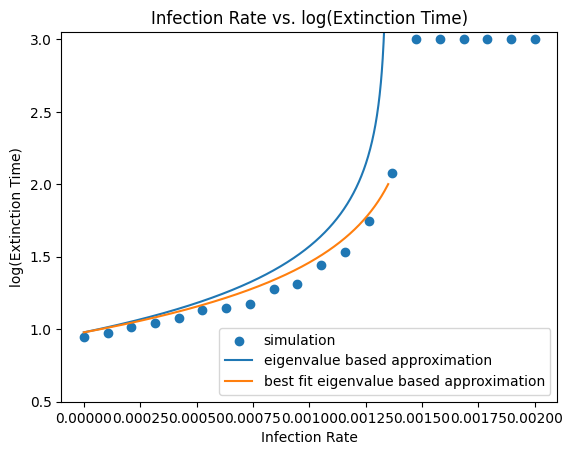

In [8]:
import matplotlib.pyplot as plt
plt.scatter(b_array, np.log10(barabasi_extinction_times), label = 'simulation')
plt.plot(model_b, np.log10(model), label = 'eigenvalue based approximation')
plt.plot(model_b, np.log10(model_best_fit), label = 'best fit eigenvalue based approximation')
# plt.errorbar(b_array, np.log10(uniform_extinction_times), y_error)
plt.legend()
plt.ylim(0.5, 3.05)
plt.title('Infection Rate vs. log(Extinction Time)')
plt.ylabel('log(Extinction Time)')
plt.xlabel('Infection Rate')
plt.show()
